# Experiment 1: Baselines

WANDB tag: `exp1`

In [1]:
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
api = wandb.Api(api_key="cc080145b244f97b7db093ba0e3de5088e7ee7aa")

In [3]:
runs = api.runs(path="acs-thesis-lb2027/gnn-baselines", include_sweeps=False, filters={"$and": [{"tags": {"$in": ["exp1"]}}, {"state": "finished"}]})

In [4]:
rows = []

for run in runs:
	row = {
		"model": run.config["model"],
		"dataset": run.config["dataset"],
		"test_accuracy": run.summary["test/accuracy"]
	}
	
	rows.append(row)

In [5]:
df = pd.DataFrame(rows)

In [6]:
df

,model,dataset,test_accuracy
0,HGT,ACM,0.947
1,HGT,ACM,0.944
2,HGT,ACM,0.948
3,HGT,ACM,0.941
4,HGT,ACM,0.954
...,...,...,...
251,DiagSheaf,DBLP,0.954
252,DiagSheaf,DBLP,0.964
253,DiagSheaf,DBLP,0.958
254,DiagSheaf,DBLP,0.970


<Axes: xlabel='model', ylabel='test_accuracy'>

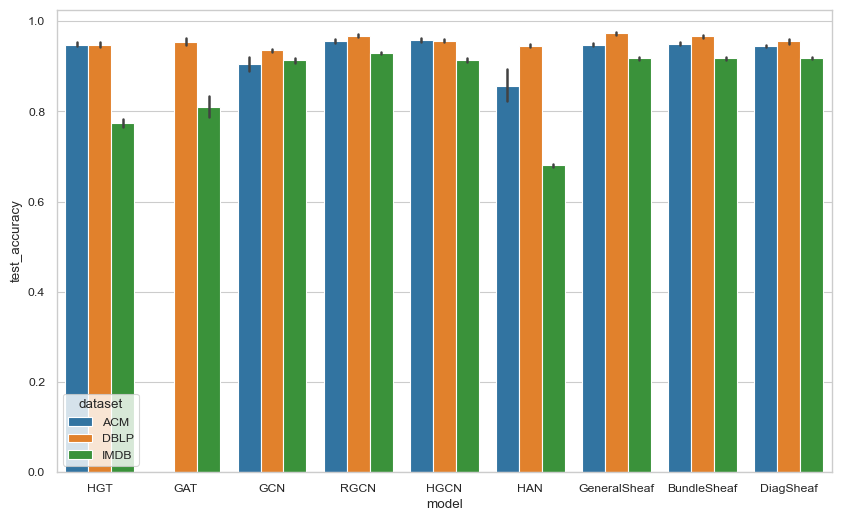

In [7]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

sns.barplot(df, x="model", y="test_accuracy", hue="dataset", ax=ax)

In [8]:
grouped = df.groupby(["model", "dataset"]).agg(["mean", "std", "max"])
grouped_mean = grouped["test_accuracy"]["mean"].unstack()
grouped_mean.style.format(precision=4).highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9506,0.9672,0.9181
DiagSheaf,0.9454,0.9553,0.9191
GAT,nan,0.9551,0.8103
GCN,0.9050,0.9356,0.9134
GeneralSheaf,0.9485,0.9736,0.9179
HAN,0.8565,0.9458,0.6801
HGCN,0.9587,0.9570,0.9141
HGT,0.9486,0.9479,0.7752
RGCN,0.9568,0.9679,0.9305


In [9]:
grouped_max = grouped["test_accuracy"]["max"].unstack()
grouped_max.style.format(precision=4).highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9610,0.9750,0.9294
DiagSheaf,0.9510,0.9700,0.9258
GAT,nan,0.9760,0.8714
GCN,0.9300,0.9470,0.9244
GeneralSheaf,0.9550,0.9810,0.9264
HAN,0.9520,0.9550,0.6910
HGCN,0.9690,0.9640,0.9246
HGT,0.9620,0.9630,0.7876
RGCN,0.9670,0.9760,0.9366


In [10]:
grouped_std = grouped["test_accuracy"]["std"].unstack()
grouped_std.style.format(precision=4)

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.0065,0.0050,0.0061
DiagSheaf,0.0042,0.0086,0.0045
GAT,nan,0.0133,0.0380
GCN,0.0261,0.0059,0.0096
GeneralSheaf,0.0062,0.0050,0.0058
HAN,0.0633,0.0061,0.0052
HGCN,0.0064,0.0058,0.0079
HGT,0.0081,0.0097,0.0153
RGCN,0.0084,0.0055,0.0036


In [11]:
df

,model,dataset,test_accuracy
0,HGT,ACM,0.947
1,HGT,ACM,0.944
2,HGT,ACM,0.948
3,HGT,ACM,0.941
4,HGT,ACM,0.954
...,...,...,...
251,DiagSheaf,DBLP,0.954
252,DiagSheaf,DBLP,0.964
253,DiagSheaf,DBLP,0.958
254,DiagSheaf,DBLP,0.970


In [12]:
final = grouped['test_accuracy'][['mean', 'std']]

In [13]:
def process_results(row):
    return f"{row['mean']:.4f}({row['std']:.4f})"
final['test_accuracy'] = final[['mean', 'std']].agg(process_results, axis=1)
final = final['test_accuracy'].unstack()

In [14]:
final

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9506(0.0065),0.9672(0.0050),0.9181(0.0061)
DiagSheaf,0.9454(0.0042),0.9553(0.0086),0.9191(0.0045)
GAT,NaN,0.9551(0.0133),0.8103(0.0380)
GCN,0.9050(0.0261),0.9356(0.0059),0.9134(0.0096)
GeneralSheaf,0.9485(0.0062),0.9736(0.0050),0.9179(0.0058)
HAN,0.8565(0.0633),0.9458(0.0061),0.6801(0.0052)
HGCN,0.9587(0.0064),0.9570(0.0058),0.9141(0.0079)
HGT,0.9486(0.0081),0.9479(0.0097),0.7752(0.0153)
RGCN,0.9568(0.0084),0.9679(0.0055),0.9305(0.0036)


In [15]:
latex_table = final.style.to_latex(hrules=True, siunitx=True, column_format='lSSS')

In [16]:
with open("../tables/exp1_acc.tex", "w+") as f:
    f.write(latex_table)

## Runtime Analysis

In [17]:
rows = []

for run in runs:
	row = {
		"model": run.config["model"],
		"dataset": run.config["dataset"],
		"runtime": run.summary["_runtime"]
	}
	
	rows.append(row)

In [18]:
df_rt = pd.DataFrame(rows)
df_rt

,model,dataset,runtime
0,HGT,ACM,583.742247
1,HGT,ACM,577.061824
2,HGT,ACM,570.433954
3,HGT,ACM,543.129034
4,HGT,ACM,573.250262
...,...,...,...
251,DiagSheaf,DBLP,14.607086
252,DiagSheaf,DBLP,15.786046
253,DiagSheaf,DBLP,78.487964
254,DiagSheaf,DBLP,75.637757


In [19]:
grouped_rt = df_rt.groupby(["model", "dataset"]).agg(["mean", "std", "max"])
grouped_rt.style.format(precision=1)

grouped_rt['runtime_final'] = grouped_rt['runtime'][['mean', 'std']].agg(process_results, axis=1)
final_rt = grouped_rt['runtime_final'].unstack()

In [20]:
final_rt

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,230.8867(0.4877),50.2510(2.5769),40.5528(0.8624)
DiagSheaf,25.9138(38.8479),27.4165(26.1796),12.0483(0.4515)
GAT,NaN,161.3872(18.7326),106.0669(4.1283)
GCN,65.6198(3.5659),31.1607(1.5243),19.7993(0.6347)
GeneralSheaf,33.0413(0.4170),76.6480(11.0116),37.2581(0.7530)
HAN,27.7090(2.0382),18.0968(1.1265),16.5373(2.2492)
HGCN,77.8371(5.5047),62.1525(1.1034),70.8731(3.8934)
HGT,567.1390(18.0209),882.5029(25.2861),697.9369(3.6391)
RGCN,110.8464(1.9021),222.0993(5.8718),162.7710(11.0552)


In [21]:
mean_rt = grouped_rt['runtime']['mean'].unstack()
latex_rt = mean_rt.style.format(precision=1).to_latex(siunitx=True, hrules=True)

In [22]:
with open("../tables/exp1_rt.tex", "w+") as f:
    f.write(latex_rt)

In [71]:
df_model_size = pd.read_csv("model_size.csv")[['model', 'dataset', 'Model size']]

In [79]:
final_models_size = df_model_size.groupby(['model', 'dataset']).agg(['mean'])['Model size']['mean'].unstack()

In [80]:
latex_size = final_models_size.style.to_latex(siunitx=True, hrules=True)

In [82]:
with open("../tables/exp1_size.tex", 'w+') as f:
	f.write(latex_size)